# General OpenCV Debrief:

OpenCV - Computer Vision Library: https://opencv.org/
Available in C++, Python, Java, etc.


---


This notebook will cover how to:

---
  * Read Image
  * Convert to Grayscale
  * Normalize unusual image datatype
  * Draw Points over frame(s)
  * Draw Polygons over frame(s)
---
  * Read Video (frame by frame)
  * Write list of frames to video
  

# Pull files required for this notebook:

In [2]:
!wget -O test_image.png https://plus.unsplash.com/premium_photo-1661963288471-b72fb81c61b2?q=80&w=1752&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O test_image_multi_band.tif https://demo.sirv.com/example.tif?format=original&dl
!wget -O test_video.mp4 http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/ForBiggerBlazes.mp4  # from https://gist.github.com/jsturgis/3b19447b304616f18657

--2025-01-15 01:59:32--  https://plus.unsplash.com/premium_photo-1661963288471-b72fb81c61b2?q=80
Resolving plus.unsplash.com (plus.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to plus.unsplash.com (plus.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2267351 (2.2M) [image/jpeg]
Saving to: ‘test_image.png’

test_image.png      100%[===================>]   2.16M  --.-KB/s    in 0.08s   

2025-01-15 01:59:34 (28.1 MB/s) - ‘test_image.png’ saved [2267351/2267351]

/bin/bash: line 1: dl: command not found
--2025-01-15 01:59:34--  https://demo.sirv.com/example.tif?format=original
Resolving demo.sirv.com (demo.sirv.com)... 162.55.133.188
Connecting to demo.sirv.com (demo.sirv.com)|162.55.133.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4612231 (4.4M) [image/tiff]
Saving to: ‘test_image_multi_band.tif’

test_image_multi_ba 100%[===================>]   4.40M  5.89MB/s    in 

In [9]:
IMAGE_PATH = "test_image.png"
IMAGE_MULTIBAND = "test_image_multi_band.tif"
VIDEO_PATH = "test_video.mp4"

# Package Imports:

In [5]:
# !pip install opencv-python  # for desktop type, when you non-server like environment
!pip install opencv-python-headless  # for server-like environment, when you only have shell as output

In [6]:
import os
import cv2  # OpenCV
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# checking current directory:
os.getcwd()

'/content'

In [18]:
# checking current directory:
os.listdir(os.getcwd())

['.config',
 'test_image.png',
 'test_video.mp4',
 'test_image_multi_band.tif',
 'sample_data']

# 1. Read Image:

(3000, 4529, 3)


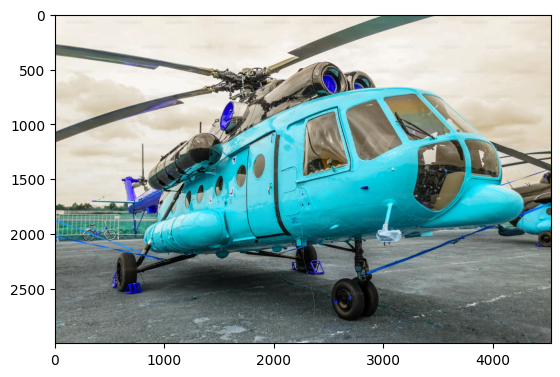

In [ ]:
# Load the image
image_bgr = cv2.imread(IMAGE_PATH)  # Replace 'image.jpg' with your file path

# Display the image
# cv2.imshow('Image', image)  # if you have non-server env cv2.imshow will display as new window with an image

# Wait until a key is pressed
# cv2.waitKey(0)  # again, for non-server env (press to close opened opencv window)

# Close the window
# cv2.destroyAllWindows()  # for non-server env to close opened opencv window(s)

print(image_bgr.shape)

# Matplotlib - common plotting library:
plt.figure()
plt.imshow(image_bgr)

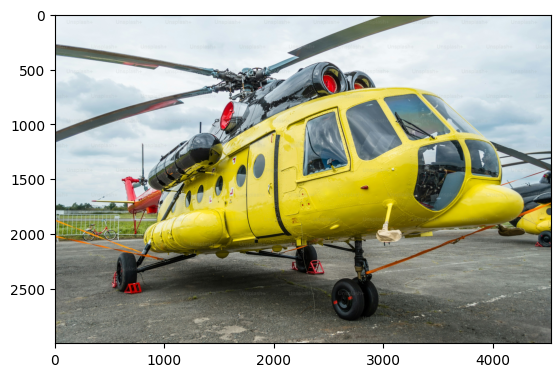

In [ ]:
# OpenCV inverts RGB color to BGR by default.
# To convert to expected order (RGB), we do:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2BGR)

plt.figure()
plt.imshow(image_rgb)

# 2. Convert to grayscale and vice versa:

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the original image
original_image = cv2.imread(IMAGE_PATH)  # Replace 'image.jpg' with your image path
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

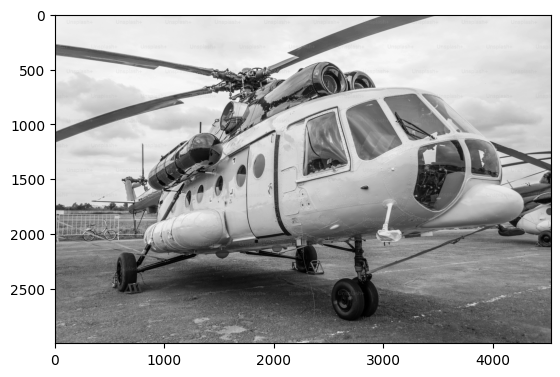

In [ ]:
# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.imshow(gray_image, cmap='gray')  # if you do not do cmap='gray', it will add artificial colors

In [ ]:
# Step 3: Save grayscale image, this way you can save also RGB images:
cv2.imwrite('grayscale_image.jpg', gray_image)

True

In [ ]:
# Step 4: Read grayscale image back
gray_image_loaded = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Image has shape of: (3000, 4529, 3)')

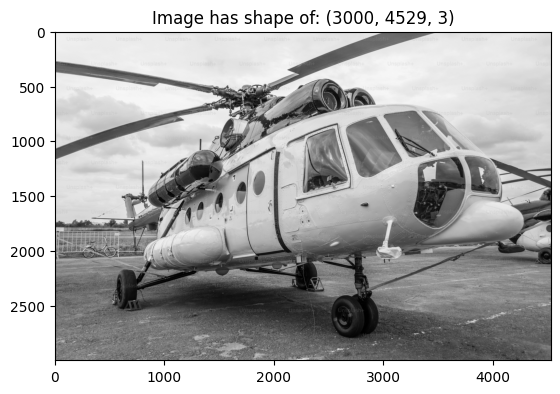

In [ ]:
# Step 5: Convert grayscale back to RGB - it will duplicate gray channel 3 times
rgb_image = cv2.cvtColor(gray_image_loaded, cv2.COLOR_GRAY2RGB)

plt.figure()
plt.imshow(rgb_image)
plt.title(f"Image has shape of: {rgb_image.shape}")  # adding title to matplot image

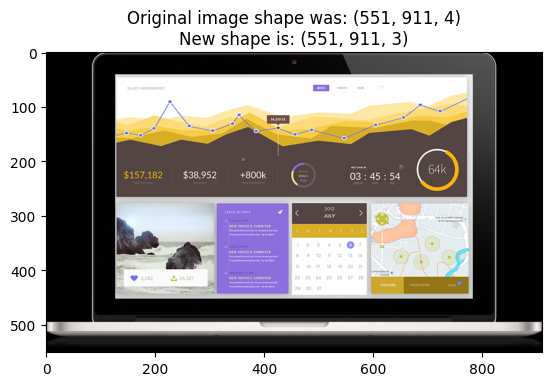

In [ ]:
# Reading non-uint8 image datatype:
image_shape_and_datatype_agnostic = cv2.imread(IMAGE_MULTIBAND, -1)  # will let you read 3+ channel images (of any datatype and shape)

plt.figure()
plt.title(f"Original image shape was: {image_shape_and_datatype_agnostic.shape}\nNew shape is: {image_shape_and_datatype_agnostic[:,:,:3].shape}")
plt.imshow(image_shape_and_datatype_agnostic[:,:,:3])  # indexing to read all COLUMNS, all ROWS, and UP TO first 3 channels

# 3. Draw points over image (frame):

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread(IMAGE_PATH)  # Replace with your image file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for Matplotlib

In [ ]:
# Define points to be drawn (x,y coordinate-wise), so here we are drawing 4 points:
points = [(150, 150), (200, 250), (300, 200), (400, 300)]  # Replace with desired points

In [ ]:
# Draw each point on the image
for point in points:
    cv2.circle(image, point, radius=5, color=(255, 0, 0), thickness=50)  # Red dots

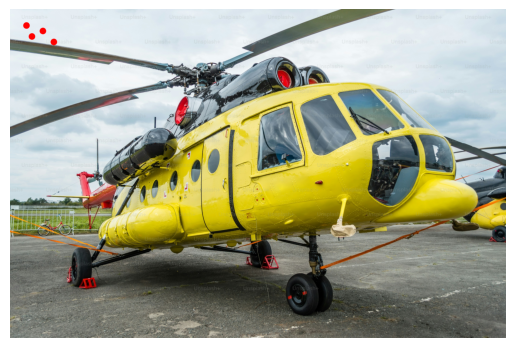

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# adding more points
# Note that old points are not gone, since we are drawing on the image variable

# Define points to be drawn (x,y coordinate-wise), so here we are drawing 4 points:
more_points = [(750, 150), (800, 250), (900, 200), (1000, 300)]  # Replace with desired points

In [ ]:
# Draw each point on the image
for another_point in more_points:
    cv2.circle(image, another_point, radius=5,
               color=(0, 0, 255),  # choosing different color
               thickness=50)  # Red dots

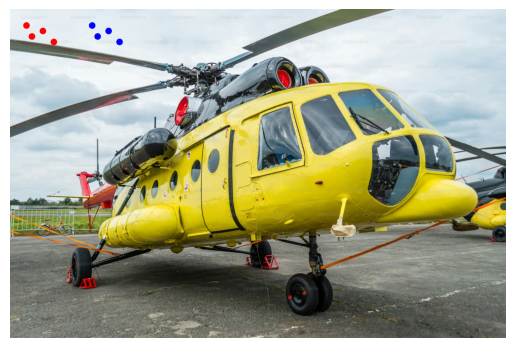

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# 4. Draw polygons over image (frame):

## 4.1 Square:

In [ ]:
# Load the input image
image = cv2.imread(IMAGE_PATH)  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

In [ ]:
# Define the square coordinates
top_left = (50, 50)       # Top-left corner (x, y)
bottom_right = (150, 150) # Bottom-right corner (x, y)

In [ ]:
# Draw the square
cv2.rectangle(image, top_left, bottom_right, color=(0, 0, 255), thickness=50)  # Green square

array([[[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [207, 224, 232],
        [207, 224, 232],
        [206, 225, 232]],

       ...,

       [[124, 130, 126],
        [118, 124, 120],
        [115, 122, 115],
        ...,
        [113, 114, 109],
        [120, 121, 116],
        [118, 118, 116]],

       [[122, 128, 124],
        [121, 127, 123],
        [120, 127, 120],
        ...,
        [114, 115, 110],
        [118, 119, 114],
        [119, 119, 117]],

       [[119, 125, 121],
        [125, 131, 127],
        [129, 136, 129],
        ...,
        [116, 117, 112],
        [116, 117, 112],
        [116, 116, 114]]

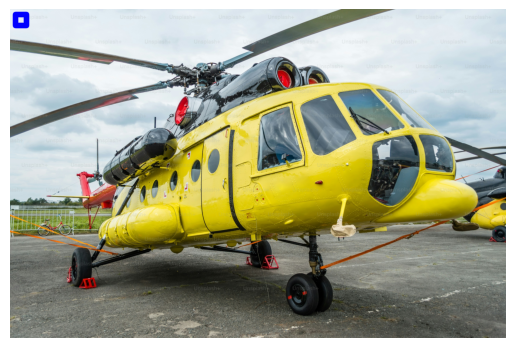

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

## 4.2 Circle:

In [ ]:
# Load the input image
image = cv2.imread(IMAGE_PATH)  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

In [ ]:
# Define the circle parameters
center = (100, 100)  # Center coordinates (x, y)
radius = 50          # Radius of the circle

In [ ]:
# Draw the circle
cv2.circle(image, center, radius, color=(255, 0, 0), thickness=30)  # Red circle outline

array([[[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [207, 224, 232],
        [207, 224, 232],
        [206, 225, 232]],

       ...,

       [[124, 130, 126],
        [118, 124, 120],
        [115, 122, 115],
        ...,
        [113, 114, 109],
        [120, 121, 116],
        [118, 118, 116]],

       [[122, 128, 124],
        [121, 127, 123],
        [120, 127, 120],
        ...,
        [114, 115, 110],
        [118, 119, 114],
        [119, 119, 117]],

       [[119, 125, 121],
        [125, 131, 127],
        [129, 136, 129],
        ...,
        [116, 117, 112],
        [116, 117, 112],
        [116, 116, 114]]

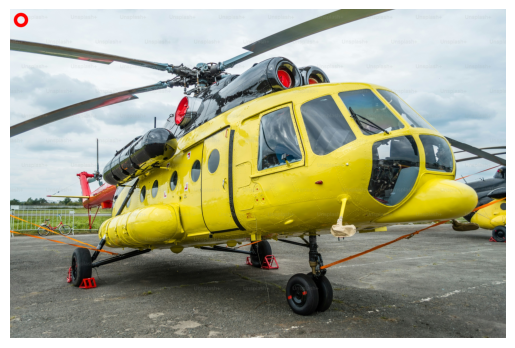

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# 4.3 Polygons (not filled):

In [ ]:
# Load the input image
image = cv2.imread(IMAGE_PATH)  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

In [ ]:
# Define polygon points
points = np.array([[40, 25], [360, 70], [400, 230], [260, 340], [30, 200]], np.int32)

In [ ]:
# Reshape points for OpenCV
points = points.reshape((-1, 1, 2))  # Required shape for cv2.polylines()

In [ ]:
# Draw the polygon
cv2.polylines(image, [points], isClosed=True, color=(0, 0, 255), thickness=30)  # Yellow polygon

array([[[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [207, 224, 232],
        [207, 224, 232],
        [206, 225, 232]],

       ...,

       [[124, 130, 126],
        [118, 124, 120],
        [115, 122, 115],
        ...,
        [113, 114, 109],
        [120, 121, 116],
        [118, 118, 116]],

       [[122, 128, 124],
        [121, 127, 123],
        [120, 127, 120],
        ...,
        [114, 115, 110],
        [118, 119, 114],
        [119, 119, 117]],

       [[119, 125, 121],
        [125, 131, 127],
        [129, 136, 129],
        ...,
        [116, 117, 112],
        [116, 117, 112],
        [116, 116, 114]]

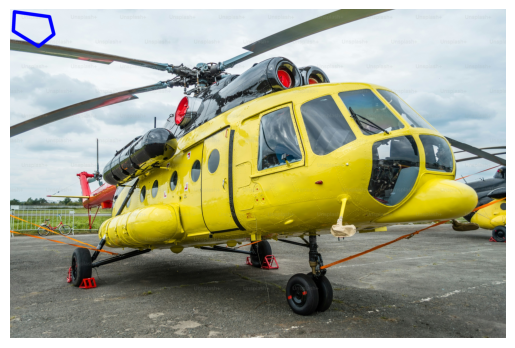

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# 4.3 Polygons (filled):

In [ ]:
# Load the input image
image = cv2.imread(IMAGE_PATH)  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

In [ ]:
# Define polygon points
points = np.array([[40, 25], [360, 70], [400, 230], [260, 340], [30, 200]], np.int32)

In [ ]:
# Reshape points for OpenCV
points = points.reshape((-1, 1, 2))  # Required shape for cv2.fillPoly()

In [ ]:
# Fill the polygon
cv2.fillPoly(image, [points], color=(255, 255, 0))  # Yellow fill (RGB)

array([[[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [207, 224, 232],
        [207, 224, 232],
        [206, 225, 232]],

       ...,

       [[124, 130, 126],
        [118, 124, 120],
        [115, 122, 115],
        ...,
        [113, 114, 109],
        [120, 121, 116],
        [118, 118, 116]],

       [[122, 128, 124],
        [121, 127, 123],
        [120, 127, 120],
        ...,
        [114, 115, 110],
        [118, 119, 114],
        [119, 119, 117]],

       [[119, 125, 121],
        [125, 131, 127],
        [129, 136, 129],
        ...,
        [116, 117, 112],
        [116, 117, 112],
        [116, 116, 114]]

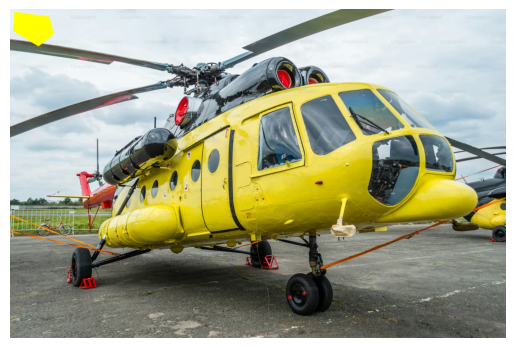

In [ ]:

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# 4.3 Polygons (filled with borders) - combine polylines + fillPoly:

In [ ]:
# Load the input image
image = cv2.imread(IMAGE_PATH)  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

In [ ]:
# Define polygon points
points = np.array([[40, 25], [360, 70], [400, 230], [260, 340], [30, 200]], np.int32)

In [ ]:
# Reshape points for OpenCV
points = points.reshape((-1, 1, 2))  # Required shape for cv2.fillPoly()

In [ ]:
# Fill the polygon with yellow color
cv2.fillPoly(image, [points], color=(255, 255, 0))  # Yellow fill (RGB)

array([[[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [207, 224, 232],
        [207, 224, 232],
        [206, 225, 232]],

       ...,

       [[124, 130, 126],
        [118, 124, 120],
        [115, 122, 115],
        ...,
        [113, 114, 109],
        [120, 121, 116],
        [118, 118, 116]],

       [[122, 128, 124],
        [121, 127, 123],
        [120, 127, 120],
        ...,
        [114, 115, 110],
        [118, 119, 114],
        [119, 119, 117]],

       [[119, 125, 121],
        [125, 131, 127],
        [129, 136, 129],
        ...,
        [116, 117, 112],
        [116, 117, 112],
        [116, 116, 114]]

In [ ]:
# Draw the border in green
cv2.polylines(image, [points], isClosed=True, color=(0, 0, 255), thickness=20)  # Green border

array([[[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [208, 225, 233],
        [208, 225, 233],
        [206, 225, 232]],

       [[234, 241, 247],
        [234, 241, 247],
        [234, 241, 247],
        ...,
        [207, 224, 232],
        [207, 224, 232],
        [206, 225, 232]],

       ...,

       [[124, 130, 126],
        [118, 124, 120],
        [115, 122, 115],
        ...,
        [113, 114, 109],
        [120, 121, 116],
        [118, 118, 116]],

       [[122, 128, 124],
        [121, 127, 123],
        [120, 127, 120],
        ...,
        [114, 115, 110],
        [118, 119, 114],
        [119, 119, 117]],

       [[119, 125, 121],
        [125, 131, 127],
        [129, 136, 129],
        ...,
        [116, 117, 112],
        [116, 117, 112],
        [116, 116, 114]]

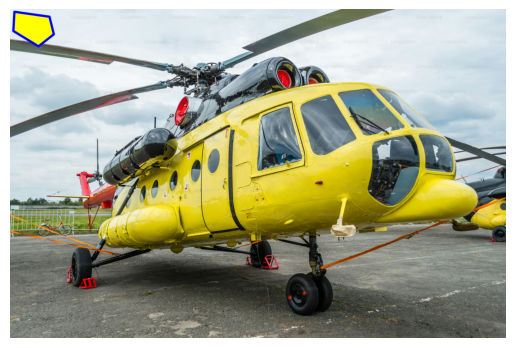

In [ ]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()



---





---





---



# 5. Reading video (frame by frame):

5.1 (non-server like environment, where you have can open application window as UI):

In [ ]:
'''
import cv2

# Load the video
video_path = VIDEO_PATH  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    while True:
        # Read frame-by-frame
        ret, frame = cap.read()

        # If the frame is read correctly, ret will be True
        if not ret:
            print("End of video.")
            break

        # Display the frame
        cv2.imshow('Video Frame', frame)

        # Wait for 1 ms before moving to the next frame, and check for 'q' key to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the video capture object and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()
'''

5.2. (server-like environment:
* you need to either stream/export frames somewhere (aws bucket)
* or display using matplotlib in notebook):

In [ ]:
import cv2

# Load the input video
input_video_path = VIDEO_PATH  # Replace with your input video file path
output_video_path = 'output_video.mp4'  # Replace with the desired output video file path

# Open the input video
cap = cv2.VideoCapture(input_video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open input video.")
else:
    # Get the video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second of the input video

    # Define the codec and create VideoWriter object to save the video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' is for MP4 codec
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        # Read the frame
        ret, frame = cap.read()

        # If the frame is read correctly, ret will be True
        if not ret:
            print("End of video.")
            break

        # Write the frame to the output video file
        out.write(frame)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print(f"Video saved as {output_video_path}")

End of video.
Video saved as output_video.mp4


In [ ]:
from IPython.display import Video
Video(output_video_path)

In [12]:
# OR:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(3,3))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
video = imageio.mimread(output_video_path, memtest=False)  # Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    # Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  # Inline video display in HTML5

# 6. Working on Real-Time Video Analysis (this can be object detection, tracking, etc.). Here, we transform frames to perform Canny-based masking:

In [31]:
# Load the input video
input_video_path = VIDEO_PATH  # Replace with your input video file path
output_edge_detected_video_path = 'edge_detected_output_video.mp4'  # Replace with the desired output video file path

if os.path.exists(output_edge_detected_video_path):
  os.remove(output_edge_detected_video_path)

cap = cv2.VideoCapture(input_video_path)

frames = []

while(1):
    try:
        _, frame = cap.read()

        # USUALLY THIS SECTION WILL BE WHERE YOU MODIFY FRAME
        # EITHER APPLY COMPUTER VISION ALGORITHM
        # OR FEED MODEL WITH YOUR FRAME AND USE MODEL OUTPUT FOR YOUR FURTHER ACTIONS
        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply GaussianBlur to reduce noise
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)

        # Perform Canny edge detection
        edges_frame = cv2.Canny(blurred, threshold1=10, threshold2=150)

        frames.append(edges_frame)

    except Exception:
        break

width = int(cap.get(3))
height = int(cap.get(4))

# Write to video:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter(output_edge_detected_video_path, fourcc, 25, (width, height), isColor=False)

for frame in frames:
    writer.write(frame)

cap.release()
writer.release()

# with open(output_edge_detected_video_path, 'rb') as f:
#     video.value = f.read()

In [32]:
video = imageio.mimread(output_edge_detected_video_path, memtest=False)  # Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    # Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  # Inline video display in HTML5